EJEMPLO 5 EDA ANÁLISIS EXPLORATORIO DE DATOS

1) para este paso lo primero es llamar las librerias

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2) Vamos a crear un dataset simulado

- usando numpy creamos una semilla pseudo aleatoria de 42 semillas, creamos un dataframe con las siguientes columnas Edad, Ingreso, Genero, Compró 

In [17]:
sns.set(style="whitegrid")

np.random.seed(42)
data = pd.DataFrame({
    'Edad': np.random.normal(35, 10, 100), 
    'Ingresos': np.random.normal(50000, 15000, 100),
    'Genero': np.random.choice(['Masculino', 'Femenino'], 100),
    'Compró': np.random.choice([0, 1], 100, p=[0.4, 0.6])
})


data.loc[5:10, 'Ingresos'] = np.nan


3) vista de encabezado de los datos

In [18]:
data.head()

,Edad,Ingresos,Genero,Compró
0,39.967142,28769.438869,Femenino,1
1,33.617357,43690.320159,Femenino,1
2,41.476885,44859.282252,Masculino,1
3,50.230299,37965.840962,Femenino,0
4,32.658466,47580.714325,Masculino,0


4) Resumen estadístico 

In [19]:

data.describe()

,Edad,Ingresos,Compró
count,100.000000,94.000000,100.000000
mean,33.961535,50239.570884,0.600000
std,9.081684,14132.987109,0.492366
min,8.802549,25887.751482,0.000000
25%,28.990943,37813.594535,0.000000
50%,33.730437,50965.948886,1.000000
75%,39.059521,58559.423176,1.000000
max,53.522782,90802.537499,1.000000


5) Ahora se visualizan los datos 

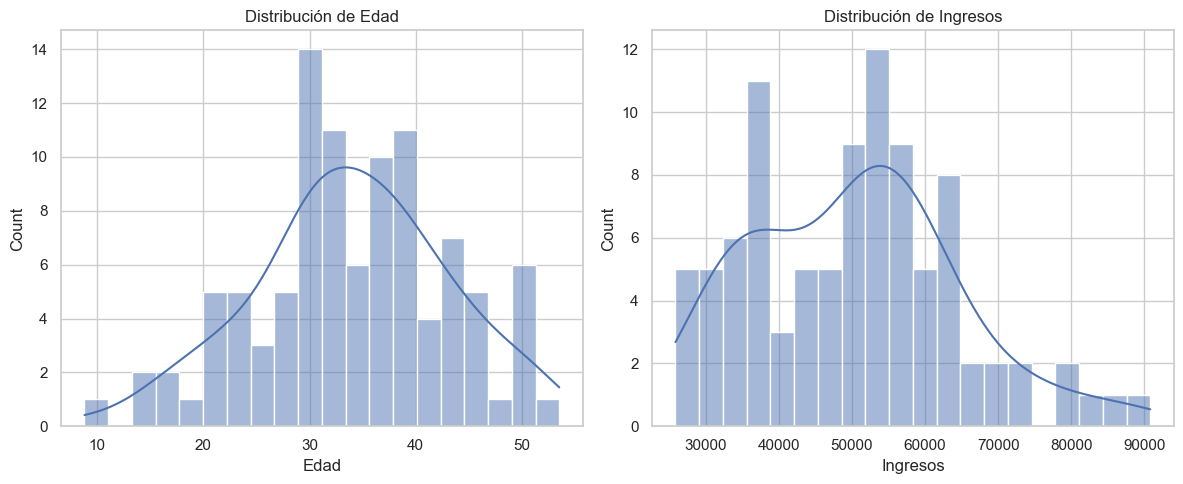

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Edad'], kde=True, bins=20)
plt.title('Distribución de Edad')

plt.subplot(1, 2, 2)
sns.histplot(data['Ingresos'], kde=True, bins=20)
plt.title('Distribución de Ingresos')
plt.tight_layout()
plt.show()


6) Detectar valores atípicos o outliers usando boxplot 

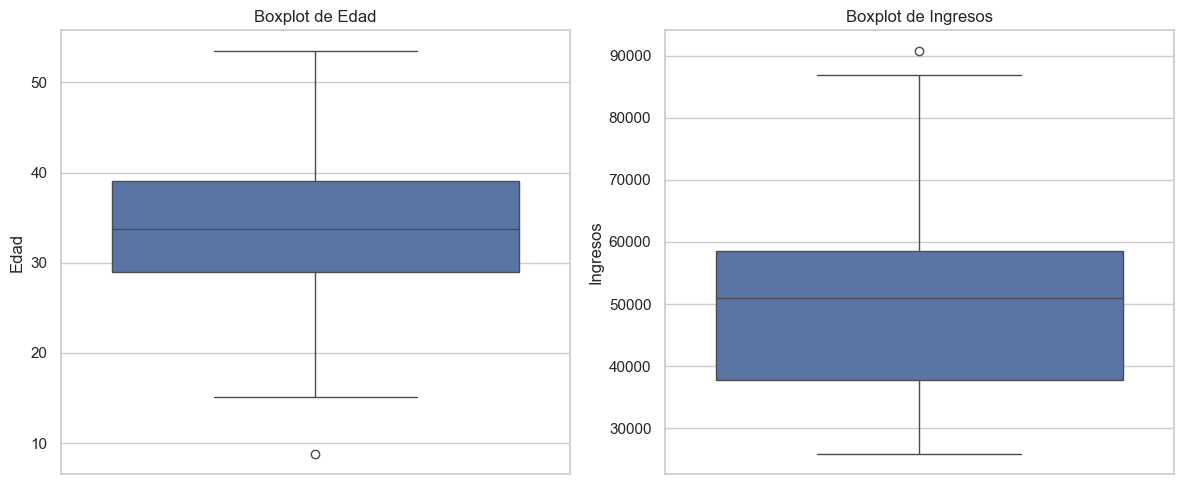

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['Edad'])
plt.title('Boxplot de Edad')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Ingresos'])
plt.title('Boxplot de Ingresos')

plt.tight_layout()
plt.show()


7) Análisis de correlación 
7.1) Evaluar correlación, 

In [22]:
data.corr(numeric_only=True)

,Edad,Ingresos,Compró
Edad,1.000000,-0.193788,-0.057096
Ingresos,-0.193788,1.000000,0.061525
Compró,-0.057096,0.061525,1.000000


7.2) visualización de correlación en heatmap 

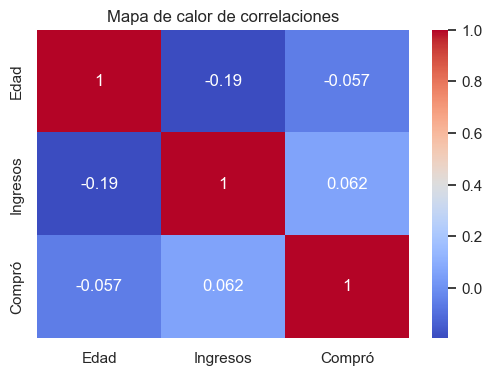

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


8) Manejo de valores faltantes
8.1) Buscar los valores nulos 

In [24]:
data.isnull().sum()


Edad        0
Ingresos    6
Genero      0
Compró      0
dtype: int64

8.2) Se visualiza donde se tienen los valores nulos (Ingresos), y se hace una imputación con la media

In [25]:
data['Ingresos'] = data['Ingresos'].fillna(data['Ingresos'].mean())
data.isnull().sum()


Edad        0
Ingresos    0
Genero      0
Compró      0
dtype: int64

8.1) visualización de las correlaciones

In [26]:
data.corr(numeric_only=True)


,Edad,Ingresos,Compró
Edad,1.000000,-0.188558,-0.057096
Ingresos,-0.188558,1.000000,0.059754
Compró,-0.057096,0.059754,1.000000


8.2) gráfico

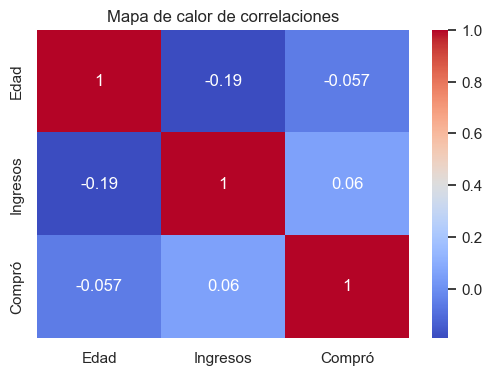

In [27]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()